In [1]:
using Plots
upscale =.5#8x upscaling in resolution
linescale=2
fontescale=2
fntsm = Plots.font("arial", pointsize=round(10.0*upscale*fontescale))
fntlg = Plots.font("arial", pointsize=round(14.0*upscale*fontescale))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
default(size=(1233*upscale,722*upscale)) #Plot canvas size
using LaTeXStrings

function get_files(direct,filenames)
    filenames=glob(filenames,direct)
    return filenames
end


get_files (generic function with 1 method)

In [2]:
include("../Src/Find-optimal-alpha-mix.jl")

simulation_alphaopt_rep_nextsteps (generic function with 1 method)

In [3]:
#Start of the simulation 
β=2  # change to produce data for figure suplement 
δmax=0.4
alphas=20  # number of collected memories 
meanencounters=100
steps=100 # steps in the 
gradients=20 # gradients used at each step 
λ=0.25 #perameters for gradeant decent
λ2=0.1
reps=200 # number of independen intruders with \delta drown randomly
trails=5 # number of trails 
for rep in 1:trails
    
    simulation_alphaopt_rep(β,δmax,alphas,meanencounters,reps,steps,gradients,λ,λ2,rep)
end

I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_1.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_1.jld2 exestieren schon ich hoehre auf
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_2.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_2.jld2 exestieren schon ich hoehre auf
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_3.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_3.jld2 exestieren schon ich hoehre auf
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_

In [4]:

direct="Data/DM_bcell_drift_alphaopt/"
filrname="meanencounters_$(meanencounters)/reps_$(reps)/*beta_$(β)-Delmax_$(δmax)-asteps_$(alphas)-grad_$(gradients)_steps_$(steps)_l1_*_rep_*.jld2"
files = get_files(direct,filrname)

5-element Array{String,1}:
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_1.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_2.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_3.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_4.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_100_l1_0.25_l2_0.1_rep_5.jld2"

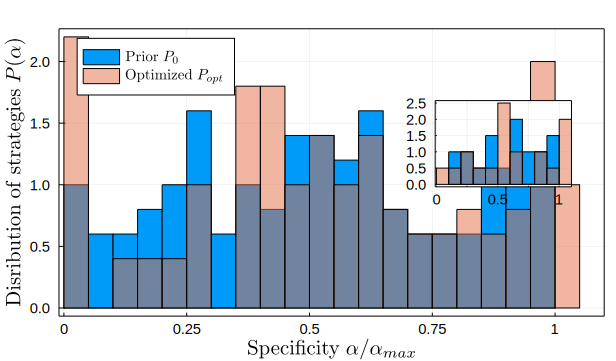

In [5]:

astarts = Vector{Float64}()
afins = Vector{Float64}()
binshere=20
Result_of_rep=1




xlimits=(-0.01,1.1)
amax=4
for ii in 1:length(files)
    
    append!(astarts, load(files[ii],"Astart")./amax)
    append!(afins, load(files[ii],"Afin")./amax)
end

histogram(astarts,bins=binshere,normed=true,label=L"\mathrm{Prior }\;  P_{0}",framestyle=:box,linestyle=:solid, linealpha=1, linewidth=1*upscale*linescale)
p=histogram!(afins,bins=binshere,normed=true,xlabel=L"\mathrm{Specificity }\;  \alpha / \alpha_{max}",ylabel=L"\mathrm{Disribution \; of \; strategies }\;P(\alpha)",label=L"\mathrm{Optimized }\;P_{opt}",framestyle=:box,linestyle=:solid, linealpha=1, linewidth=1*upscale*linescale,legend=:topleft,title=" ",alpha=0.5,xticks=([0,.25,0.5,.75,1],["0","0.25","0.5","0.75","1"]),xlims=xlimits)





astart= load(files[Result_of_rep],"Astart")./amax
afin= load(files[Result_of_rep],"Afin")./amax
histogram!([astart],bins=10,normed=true,label="",framestyle=:box,linestyle=:solid,inset = (1, bbox(0.69,0.25,0.25,0.3)), subplot=2,  linealpha=1, linewidth=1*upscale*linescale,alpha=[1],xticks=([0,.25,.5,.75,1],["0","","0.5","","1"]),xlims=xlimits,normalize=true)
hist1inlay2=histogram!(p[2],[afin],bins=10,normed=true,label="",framestyle=:box,linestyle=:solid,  linealpha=1, linewidth=1*upscale*linescale,xticks=([0,.25,.5,.75,1],["0","","0.5","","1"]),xlims=xlimits,normalize=true,fg_text=:white,alpha=0.5)





hist1inlay2



seems like we need some more gradient staps 

In [6]:
# do more steps starting from last data 
β=2
δmax=0.4
alphas=20
meanencounters=100
startstep=100
steps=1000
gradients=20
λ=0.25 #perameters for gradeant decent
λ2=0.1
reps=200
trails=5
for rep in 1:trails
    simulation_alphaopt_rep_nextsteps(β,δmax,alphas,meanencounters,reps,steps,gradients,λ,λ2,rep,startstep)
end

Loaded data and will start simulation
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_1.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_1.jld2 exestieren schon ich hoehre auf
Loaded data and will start simulation
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_2.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_2.jld2 exestieren schon ich hoehre auf
Loaded data and will start simulation
I want to do  Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_3.jld2
Die daten Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1

In [7]:

direct="Data/DM_bcell_drift_alphaopt/"
filrname="meanencounters_$(meanencounters)/reps_$(reps)/*beta_$(β)-Delmax_$(δmax)-asteps_$(alphas)-grad_$(gradients)_steps_$(steps)_l1_*_rep_*.jld2"
files = get_files(direct,filrname)

5-element Array{String,1}:
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_1.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_2.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_3.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_4.jld2"
 "Data/DM_bcell_drift_alphaopt/meanencounters_100/reps_200/beta_2-Delmax_0.4-asteps_20-grad_20_steps_1000_l1_0.25_l2_0.1_rep_5.jld2"

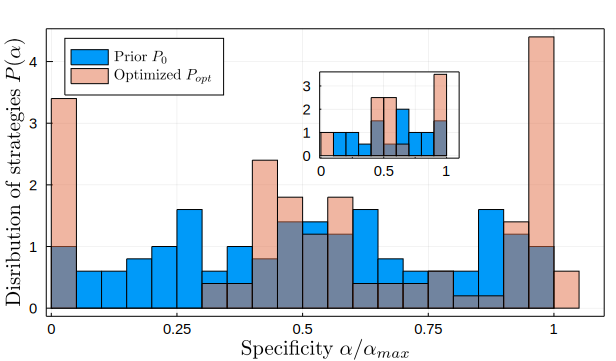

In [8]:

astarts = Vector{Float64}()
afins = Vector{Float64}()

binshere=20
Result_of_rep=1




xlimits=(-0.01,1.1)
amax=4
for ii in 1:length(files)
    
    append!(astarts, load(files[ii],"Astart")./amax)
    append!(afins, load(files[ii],"Afin")./amax)

end

histogram(astarts,bins=binshere,normed=true,label=L"\mathrm{Prior }\;  P_{0}",framestyle=:box,linestyle=:solid, linealpha=1, linewidth=1*upscale*linescale)
p=histogram!(afins,bins=binshere,normed=true,xlabel=L"\mathrm{Specificity }\;  \alpha / \alpha_{max}",ylabel=L"\mathrm{Disribution \; of \; strategies }\;P(\alpha)",label=L"\mathrm{Optimized }\;P_{opt}",framestyle=:box,linestyle=:solid, linealpha=1, linewidth=1*upscale*linescale,legend=:topleft,title=" ",alpha=0.5,xticks=([0,.25,0.5,.75,1],["0","0.25","0.5","0.75","1"]),xlims=xlimits)





astart= load(files[Result_of_rep],"Astart")./amax
afin= load(files[Result_of_rep],"Afin")./amax
histogram!([astart],bins=10,normed=true,label="",framestyle=:box,linestyle=:solid,inset = (1, bbox(0.49,0.15,0.25,0.3)), subplot=2,  linealpha=1, linewidth=1*upscale*linescale,alpha=[1],xticks=([0,.25,.5,.75,1],["0","","0.5","","1"]),xlims=xlimits,normalize=true)
hist1inlay2=histogram!(p[2],[afin],bins=10,normed=true,label="",framestyle=:box,linestyle=:solid,  linealpha=1, linewidth=1*upscale*linescale,xticks=([0,.25,.5,.75,1],["0","","0.5","","1"]),xlims=xlimits,normalize=true,fg_text=:white,alpha=0.5)





hist1inlay2


All ready looks much better.
Differnce to the results presented in the paper can be explained with the simulation parameters. 

In [9]:
#extracting used memories 

encounters=300
reps=1000
dmax=0.4
aused=Vector{Float64}()
β=2
afins = Vector{Float64}()


for ii in 1:length(files)
    append!(afins, load(files[ii],"Afin"))

end

for round in 1:reps
    δ=rand()*dmax
    v=newv_drift(δ,1) #start the memory  at t=0
    n=2
    for encounter in 2:encounters  #start at 1 because initialization is allways at 0 in the first round without any prior memory
        
        if(takememory_alpha_set(β,v,afins))
            probs=energymemory.(v,afins)
            d = Categorical(probs./sum(probs))
            pos=rand(d)
            append!(aused, afins[pos])
            v=newv_drift(δ,n)
            n+=1
        else
           v=newv_drift(δ,1)
            n=2
        end
         
    end


end

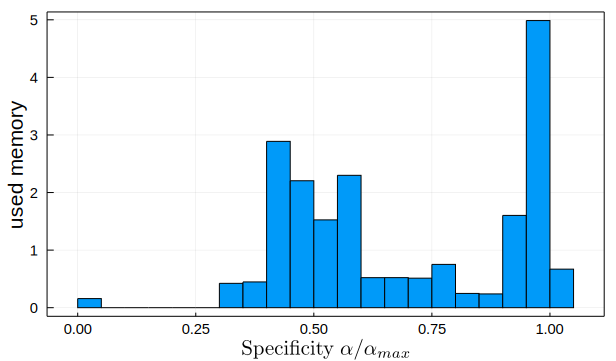

In [10]:
histogram(aused./amax,bins=binshere,normed=true,label="",framestyle=:box,linestyle=:solid, linealpha=1, linewidth=1*upscale*linescale,xlabel=L"\mathrm{Specificity }\;  \alpha / \alpha_{max}",ylabel="used memory")

